# Scatter Plot Using Matplotlib and Seaborn

**Scatter Plots are for quantitative variable v.s. quantitative variable**

[1. Scatter Plot in Matplotlib]()

[2. Scatter Plot in Seaborn]()

[3. OverPlotting Problem]()

- [Sampling Technique]()
- [Transparency Technique]()
- [Jitter Techinique]()
- [Combination of Transparentcy and Jitter]()

In [1]:
import os
os.chdir("projects_on_GitHub/data_viz/Visualization_with_mpl_and_sns")

In [2]:
# 导入数据
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### 1. Use `plt.scatter()` to draw a scatter plot.

#### Example 1. Study the relationship between `displacement` and `fuel efficiency` of cars.

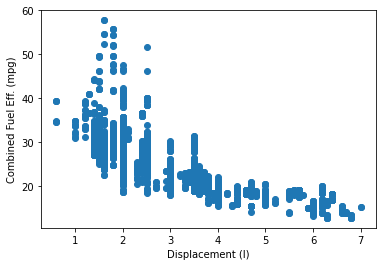

In [3]:
# 利用plt.scatter()绘制散点图
plt.scatter(data=fuel_econ, x='displ', y='comb')

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### 2. Use seaborn's regplot to draw scatter plot with regression line.

#### Example 2. Study the relationship between `displacement` and `fuel efficiency` of cars.

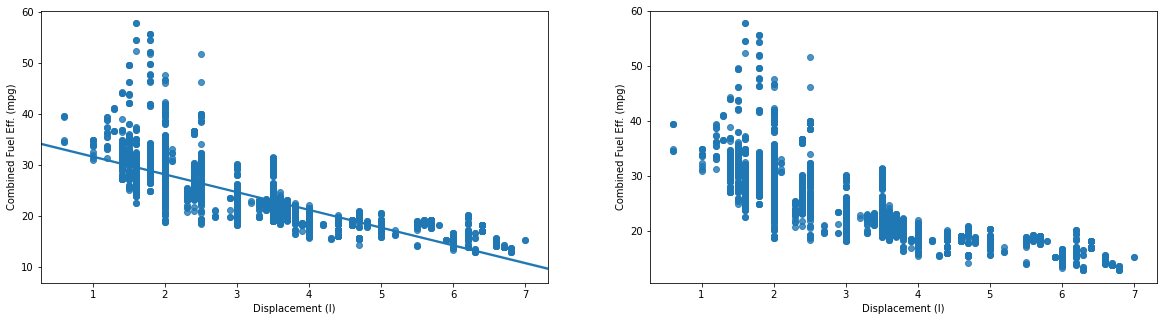

In [4]:
plt.figure(figsize=(20,5))

# With regression line
plt.subplot(1, 2, 1)
sns.regplot(data=fuel_econ, x='displ', y='comb', truncate=False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

# Without regression line
plt.subplot(1, 2, 2)
sns.regplot(data=fuel_econ, x='displ', y='comb', fit_reg=False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

#### Example 3. Study the relationship between `displacement` and `fuel efficiency` of cars on transformed scale.

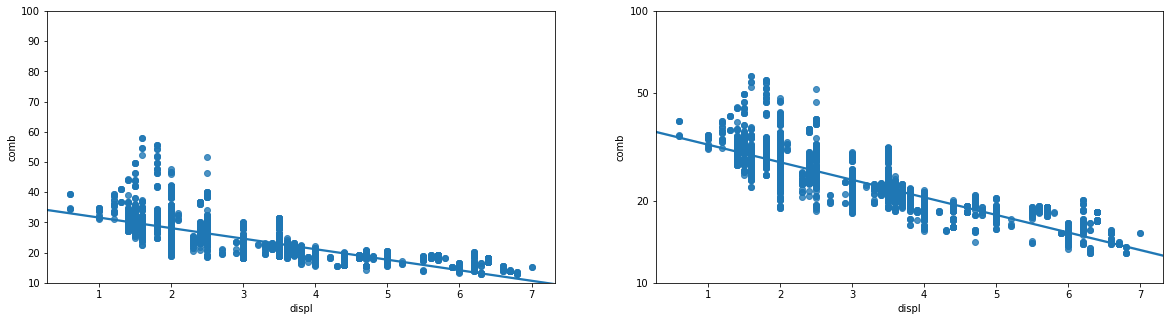

In [5]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.regplot(x=fuel_econ['displ'], y=fuel_econ['comb'], truncate=False)
plt.ylim((10, 100));

    
plt.subplot(1,2,2)
sns.regplot(x=fuel_econ['displ'], y=fuel_econ['comb'].apply(log_trans), truncate=False)
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

### 3. Overplotting Problems

#### I. Sampling Technique

#### II. Jitter Technique

#### Example 1. Study the data distribution of `efficiency` along with `years`.

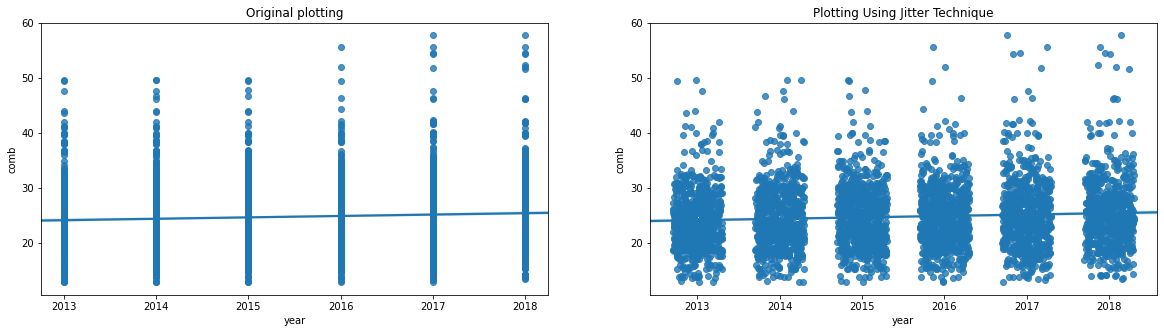

In [6]:
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False)
plt.title('Original plotting');

# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)

sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3)
plt.title('Plotting Using Jitter Technique');

**Try with different x_jitter values.**

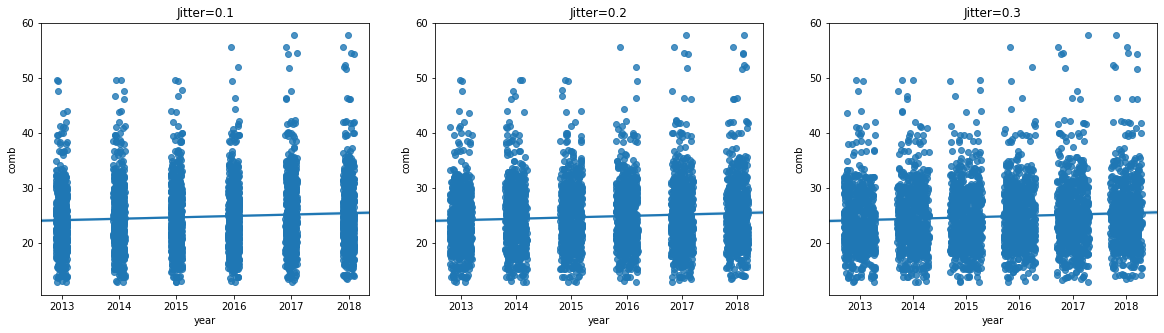

In [7]:
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])

for i in [1, 2, 3]:
    plt.subplot(1, 3, i)
    sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=i/10)
    plt.title("Jitter=0.{}".format(i));

#### III. Transparency Technique

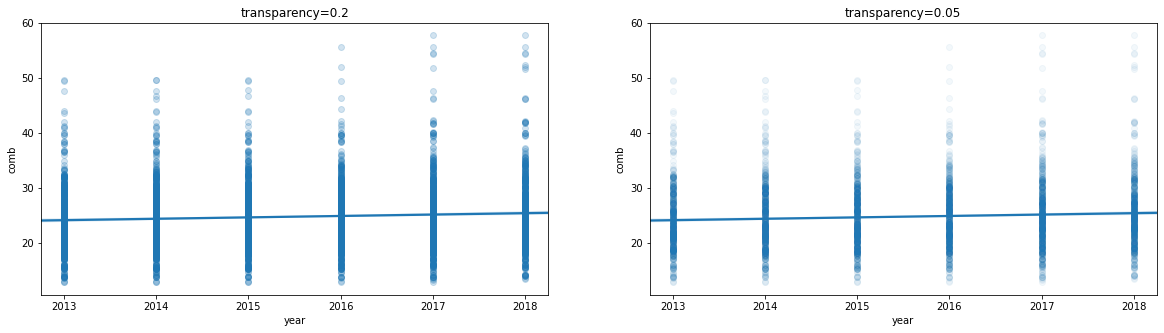

In [8]:
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 

plt.figure(figsize = [20, 5])

dict_ = {1: 1/5, 2: 1/20}

for idx, alpha in dict_.items():
    
    plt.subplot(1, 2, idx)
    sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, scatter_kws={'alpha':alpha})
    plt.title("transparency={}".format(alpha));



#### IV. Combination of Jitter and Transparency Technique.

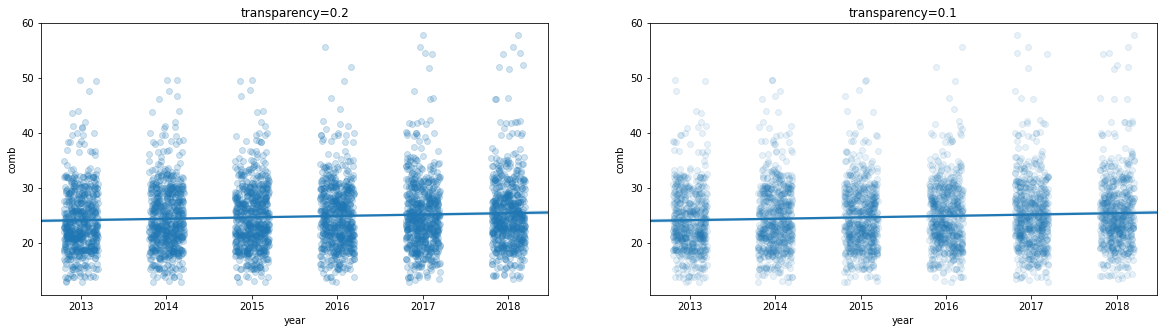

In [9]:
plt.figure(figsize = [20, 5])

dict_ = {1: 1/5, 2: 1/10}

for idx, alpha in dict_.items():
    
    plt.subplot(1, 2, idx)
    sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.2, scatter_kws={'alpha':alpha})
    plt.title("transparency={}".format(alpha));

___NOTICE:___ **`plt.scatter()` has no jitter functionality.**

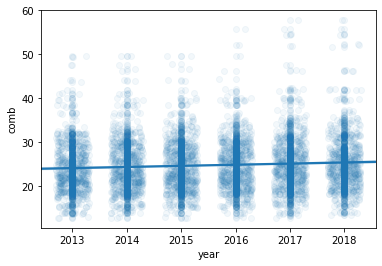

In [10]:
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha=1/20);

#### Example 4. Mileage ratings for city v.s. highway

Study on the relationship between fuel mileage ratings for city vs. highway driving, as stored in the `city` and `highway` variables (in miles per gallon, or mpg). **Use a _scatter plot_ to depict the data.**

**Questions to explore:**

1. The general relationship between these variables.
2. Any points that appear unusual against these trends above.

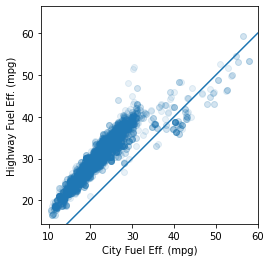

In [11]:

# ax=plt.subplot(aspect='equal')

plt.scatter(data=fuel_econ, x='city', y='highway', alpha=0.1)
# ax.set_aspect('equal')
plt.axis('square')

plt.plot([10,60], [10,60]) # diagonal line from (10,10) to (60,60)
plt.xlabel('City Fuel Eff. (mpg)')
plt.ylabel('Highway Fuel Eff. (mpg)');

Most of the data falls in a large blob between 10 and 30 mpg city and 20 to 40 mpg highway. Some transparency is added via 'alpha' to show the concentration of data. Interestingly, for most cars highway mileage is clearly higher than city mileage, but for those cars with city mileage above about 30 mpg, the distinction is less pronounced. In fact, most cars above 45 mpg city have better city mileage than highway mileage, contrary to the main trend.

## 4. Add a third variable into scatter plots -- color encodings

### Example 1. Relationship between weights and heights in `fairy` and `dragon` type pokemon.

#### Step 1: Read in `pokemon.csv` dataset.

In [12]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


#### Preparatory Step 2: Melting and Extracting.

Melt the `type_1` and `type_2` columns and select only `fairy`  and `dragon` type.

In [13]:
# Melting
type_cols = ['type_1', 'type_2']

non_type_cols = pokemon.columns.difference(type_cols)

pkmn_types = pd.melt(pokemon,
        id_vars=non_type_cols,
        value_vars=type_cols,
        var_name='type_level',
        value_name='type').dropna()

In [14]:
# Extract the two specified types
pkmn_sub = pkmn_types[pkmn_types.type.isin(['fairy', 'dragon'])]
pkmn_sub.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
34,45,113,48,1,0.6,70,35,60,65,clefairy,35,7.5,type_1,fairy
35,70,217,73,1,1.3,95,36,95,90,clefable,60,40.0,type_1,fairy
146,64,60,45,1,1.8,41,147,50,50,dratini,50,3.3,type_1,dragon
147,84,147,65,1,4.0,61,148,70,70,dragonair,70,16.5,type_1,dragon
148,134,270,95,1,2.2,91,149,100,100,dragonite,80,210.0,type_1,dragon


#### Step 3: Visualization.

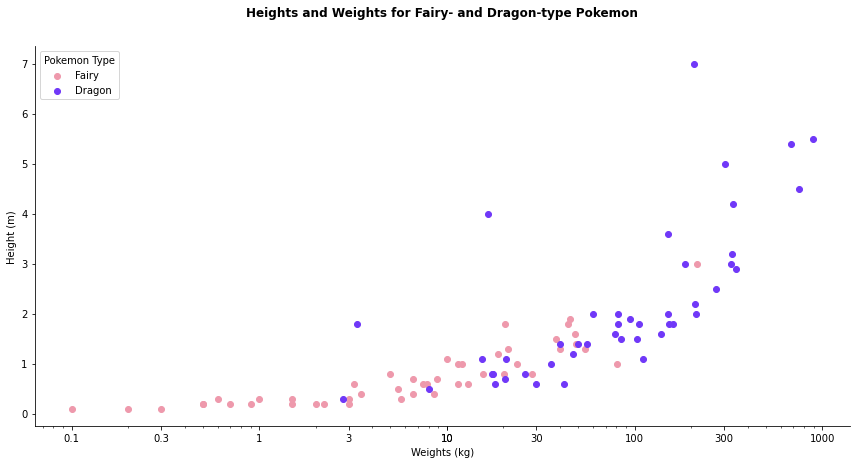

In [15]:
# Drawing the scatter plot
fg = sns.FacetGrid(data=pkmn_sub, hue='type', \
                   height=6, \
                   aspect=2, \
                   palette=dict([('fairy', '#ee99ac'), ('dragon', '#7038f8')]))

fg.map(plt.scatter, 'weight', 'height')

# Scaling the x axis
plt.xscale('log')
ticks = [0.1, 0.3, 1, 3, 10, 10, 30, 100, 300, 1000]
plt.xticks(ticks, ticks)

# Adjust the label properties
plt.xlabel('Weights (kg)')
plt.ylabel('Height (m)')
plt.legend(['Fairy', 'Dragon'], title='Pokemon Type', loc=2)

# Adjust the title property
plt.title('Heights and Weights for Fairy- and Dragon-type Pokemon', \
          pad=30, \
          fontdict={'fontsize': 12, 'fontweight': 'bold'});

#### Alternative method using `sns.scatterplot()`

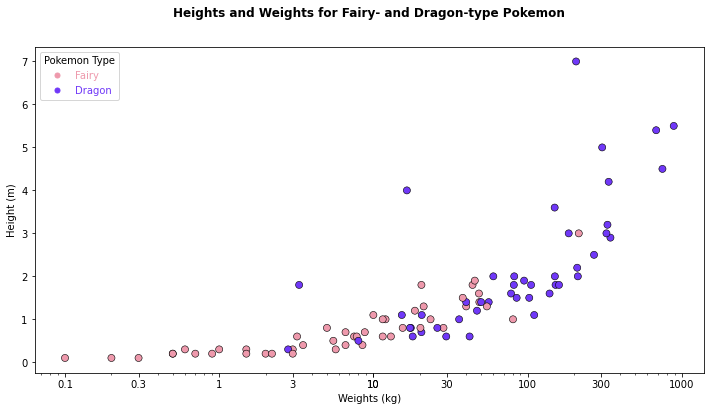

In [76]:
from matplotlib.lines import Line2D

plt.figure(figsize=(12, 6))
sns.scatterplot(data=pkmn_sub, \
                x='weight', \
                y='height', \
                hue='type', \
                palette=dict([('fairy', '#ee99ac'), ('dragon', '#7038f8')]), s=50)


plt.xscale('log')
ticks = [0.1, 0.3, 1, 3, 10, 10, 30, 100, 300, 1000]
plt.xticks(ticks, ticks)

# Adjust the label properties
plt.xlabel('Weights (kg)')
plt.ylabel('Height (m)')

# Customize legend propperties
legend_prop = [Line2D([], [], color='#ee99ac', markersize=10, marker='.', linestyle=''), \
               Line2D([], [], color='#7038f8', markersize=10, marker='.', linestyle='')]
plt.legend(legend_prop, ['Fairy', 'Dragon'], \
           labelcolor=['#ee99ac', '#7038f8'], \
           title='Pokemon Type', \
           loc=2, \
           fontsize=10)

# Adjust the title property
plt.title('Heights and Weights for Fairy- and Dragon-type Pokemon', \
          pad=30, \
          fontdict={'fontsize': 12, 'fontweight': 'bold'});

#### Additional Method - Using `plt.scatter()` function directly.

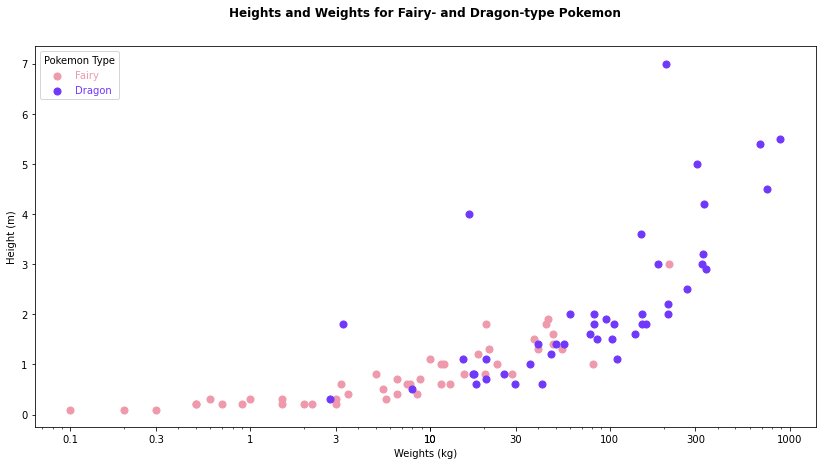

In [87]:
# Set the figure size
plt.figure(figsize=(14, 7))

# Specify the types and colors to be drawn
types_colors = [('fairy', '#ee99ac'), ('dragon', '#7038f8')]

# Draw each type in a loop separately
for type_, color_ in types_colors:
    plt.scatter(x=pkmn_sub[pkmn_sub.type==type_].weight, \
                y=pkmn_sub[pkmn_sub.type==type_].height, \
                color=color_, s=50)
    
# Scaling the x axis
plt.xscale('log')
ticks = [0.1, 0.3, 1, 3, 10, 10, 30, 100, 300, 1000]
plt.xticks(ticks, ticks)

# Adjust the label properties
plt.xlabel('Weights (kg)')
plt.ylabel('Height (m)')
plt.legend(['Fairy', 'Dragon'], title='Pokemon Type', loc=2, labelcolor=['#ee99ac', '#7038f8'])

# Adjust the title property
plt.title('Heights and Weights for Fairy- and Dragon-type Pokemon', \
          pad=30, \
          fontdict={'fontsize': 12, 'fontweight': 'bold'});